In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arrow
import datetime
import requests
import csv
from IPython.display import clear_output
import datetime

In [93]:
print(datetime.datetime.fromtimestamp(1631164406))

2021-09-09 10:43:26


In [94]:
data = pd.read_csv("XRPUSDT-8.csv")
#data = pd.read_csv("BTC_1min_sample.txt",delimiter=',')
data["Volume"] /= 1000000
k = "Time"
data[k] /= 10000
#k = datetime.datetime.fromtimestamp(data["Time"])
#data["Open"] /= 100000
#data["Close"] /= 100000
#data["Low"] /= 100000
#data["High"] /= 100000
#data.loc[data["High"].isnull(),"High"] 
#data["High"][data.loc[data["High"].isnull(),"High"].index - 1]
#data.loc[data["Open"].isnull()]
#data.loc[138]  = data.loc[137]
#data.loc[313]  = data.loc[312]
#data.loc[316]  = data.loc[315]
#data.loc[317]  = data.loc[318]
data

,Time,Open,High,Low,Close,Volume
0,162777600.0,0.7461,0.7469,0.7456,0.7459,0.607227
1,162777606.0,0.7460,0.7465,0.7431,0.7433,0.744343
2,162777612.0,0.7433,0.7438,0.7403,0.7412,1.562069
3,162777618.0,0.7413,0.7425,0.7402,0.7425,1.069950
4,162777624.0,0.7424,0.7445,0.7420,0.7444,0.524462
...,...,...,...,...,...,...
44365,163045410.0,1.1977,1.1978,1.1939,1.1942,0.466049
44366,163045416.0,1.1941,1.1941,1.1901,1.1903,0.651525
44367,163045422.0,1.1907,1.1907,1.1870,1.1874,0.582666
44368,163045428.0,1.1875,1.1877,1.1847,1.1867,0.585092


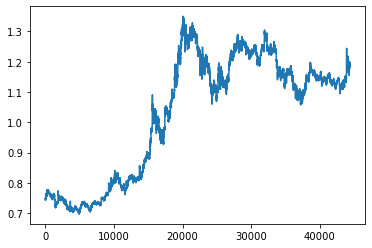

In [95]:
plt.plot(data["High"])
plt.show()

In [96]:
cm = 16
length = 10
tl = 44360

In [97]:
def h(X,wh):
    high = np.zeros(cm)
    for i in range(length):
        for j in range(5):
            for k in range(cm):
                t = wh[i,j]
                high[k] +=  t[k] * X[i,j]
    high /= (length*5)
    return high

In [98]:
def f(council,wc):
    yp = 0
    for i in range(cm):
        yp += wc[i] * council[i]
    yp /= cm
    return yp

In [99]:
#plt.plot(data["High"][300:600])
#plt.plot(data["Low"][300:600])
#plt.show()

In [100]:
def costr(yp,y):
    return (yp-y)

In [101]:
def grad(costrr,X,wh):
    a = 0.1
    t = np.random.rand(length,5,cm)
    for i in range(cm):
        t[:,:,i] = wh[:,:,i] - (a*costrr*X) 
    return t

In [102]:
def grad2(costrr,X,w):
    a = 0.1
    t = w - a*costrr*X 
    return t

In [103]:
def wieghts(str):
    ans = np.zeros(tl)
    wh = np.random.rand(length,5,cm)
    council = np.zeros(cm)
    wc = np.random.rand(cm)
    for i in range(tl):
        X = data.iloc[i:length+i,1:]
        X = np.array(X)
        council = h(X,wh)
        ans[i] = f(council,wc)
        y = data[str][i+length]
        cos = costr(ans[i],y)
        wc = grad2(cos,council,wc)
        wh = grad(cos,X,wh) 
        clear_output(wait=True)
        print((i*100)/tl , "  %")
        if(ans[i]>10000):
            break
    return wh,wc

In [104]:
#plt.plot(ans[43000:43100])
#k = data["High"][43100:43200]
#plt.plot(ans)
#k = data["High"][length:]
#k = np.array(k)
#t.plot(k)
#plt.show()

In [105]:
data2 = pd.read_csv("XRPUSDT-1m-2021-09-01.csv")
data2["Volume"] /= 10000000
data2

,Time,Open,High,Low,Close,Volume
0,1630454400000,1.1856,1.1858,1.1817,1.1819,0.061042
1,1630454460000,1.1821,1.1841,1.1805,1.1828,0.058697
2,1630454520000,1.1830,1.1834,1.1765,1.1780,0.136674
3,1630454580000,1.1778,1.1781,1.1714,1.1745,0.086984
4,1630454640000,1.1744,1.1829,1.1741,1.1825,0.058820
...,...,...,...,...,...,...
1435,1630540500000,1.2336,1.2348,1.2322,1.2331,0.033768
1436,1630540560000,1.2328,1.2343,1.2325,1.2336,0.020287
1437,1630540620000,1.2336,1.2350,1.2334,1.2340,0.021955
1438,1630540680000,1.2339,1.2377,1.2333,1.2377,0.065694


In [106]:
wopen,wcopen = wieghts("Open")

99.99774571686204   %


In [ ]:
whigh,wchigh = wieghts("High")

32.477457168620376   %


In [ ]:
wlow,wclow = wieghts("Low")

In [ ]:
wclose,wcclose = wieghts("Close")

In [ ]:
wvol,wcvol = wieghts("Volume")

In [ ]:
testlength = 20
X = pd.DataFrame(np.array(data2.iloc[1000:1000+length+testlength,1:]))

In [ ]:
for i in range(testlength):
    A = X[i:i+length]
    A = np.array(A)
    openc = h(A,wopen)
    openval = f(openc,wcopen)
    highc = h(A,whigh)
    highval = f(highc,wchigh)
    lowc = h(A,wlow)
    lowval = f(openc,wclow)
    closec = h(A,wclose)
    closeval = f(openc,wcclose)
    #volc = h(X[i:],wvol)
    #volval = f(openc,wcvol)
    volval = X.loc[length+i,4]
    X.loc[length+i] = [openval,highval,lowval,closeval,volval]

In [ ]:
plt.plot(X[1][length:])
plt.plot(data2["High"][length:length+testlength])
plt.show()